In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_table("train.tsv")
df["disp/cyl"]=df["displacement"]/df["cylinders"]
df["hrspow/cyl"]=df["horsepower"]/df["cylinders"]
df["acce/cyl"]=df["acceleration"]/df["cylinders"]
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,disp/cyl,hrspow/cyl,acce/cyl
0,0,39.4,4,85,70.0,2070,18.6,78,3,datsun b210 gx,21.25,17.500000,4.650000
1,3,18.0,6,171,97.0,2984,14.5,75,1,ford pinto,28.50,16.166667,2.416667
2,9,32.7,6,168,132.0,2910,11.4,80,3,datsun 280-zx,28.00,22.000000,1.900000
3,11,38.1,4,89,60.0,1968,18.8,80,3,toyota corolla tercel,22.25,15.000000,4.700000
4,13,28.0,4,98,80.0,2164,15.0,72,1,dodge colt (sw),24.50,20.000000,3.750000


array([[<AxesSubplot:xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='mpg', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='cylinders', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='displacement', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='weight', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='acceleration', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='model year', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='origin', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='horsepower', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='disp/cyl', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='hrspow/cyl', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='acce/cyl', ylabel='Unnamed: 0'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='mpg'>,
        <AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cylinders', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlab

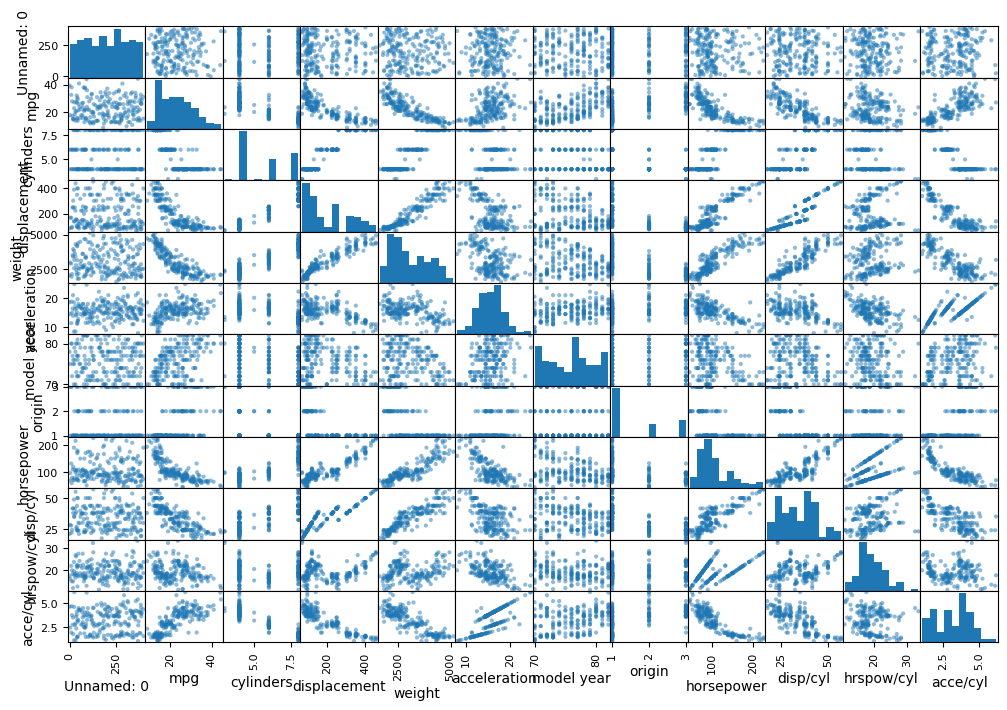

In [3]:
from pandas.plotting import scatter_matrix

attributes = ["Unnamed: 0", "mpg", "cylinders",
              "displacement", "weight", "acceleration",
              "model year", "origin", "horsepower", "disp/cyl", "hrspow/cyl", "acce/cyl"]
scatter_matrix(df[attributes], figsize=(12, 8), alpha=0.5)

In [4]:
y=df["mpg"].values
X=df.drop(["mpg","car name"], axis=1).values

In [33]:
from sklearn.model_selection import KFold
cv = KFold(n_splits = 10, random_state=0, shuffle = True)

In [34]:
import lightgbm as lgb
for train_index, test_index in cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # LightGBM用のデータセットに入れる
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_test = lgb.Dataset(X_test, y_test)
    # 評価基準を設定する 
    params = {'metric' : 'rmse'}
    # 訓練データから回帰モデルを作る
    gbm = lgb.train(params, lgb_train)

test_predicted = gbm.predict(X_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 179, number of used features: 11
[LightGBM] [Info] Start training from score 23.113408
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# モデル評価
# rmse : 平均二乗誤差の平方根
mse = mean_squared_error(y_test, test_predicted) # MSE(平均二乗誤差)の算出
rmse = np.sqrt(mse) # RSME = √MSEの算出
print('RMSE :',rmse)

#MAE
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, test_predicted)
print("MAE",mae)

# r2 : 決定係数
r2 = r2_score(y_test,test_predicted)
print('R2 :',r2)

RMSE : 2.241140599095003
MAE 1.610313537278092
R2 : 0.8944775413835953


In [36]:
df2 = pd.read_table("test.tsv")
df2["disp/cyl"]=df2["displacement"]/df2["cylinders"]
df2["hrspow/cyl"]=df2["horsepower"]/df2["cylinders"]
df2["acce/cyl"]=df2["acceleration"]/df2["cylinders"]
X2_test=df2.drop(["car name"], axis=1)
test2_predicted = gbm.predict(X2_test)

In [37]:
outdf = pd.Series(test2_predicted, index = df2["Unnamed: 0"].values )
outdf.to_csv("submit.csv", index=True, header=False)